In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
data = pd.read_csv('/content/breast_cancer.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace= True)

In [ ]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


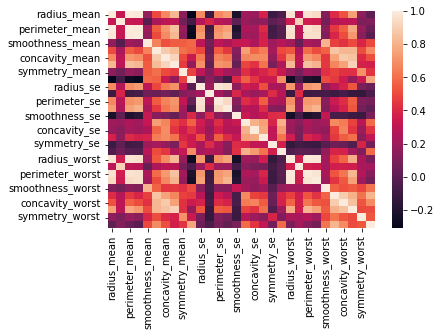

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.drop(['smoothness_worst', 'compactness_worst', 'concavity_worst', 'concavity_worst', 'symmetry_worst'], axis=1, inplace= True)

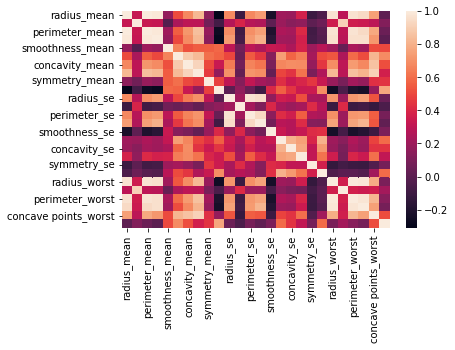

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
data.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se' ], axis=1, inplace= True)

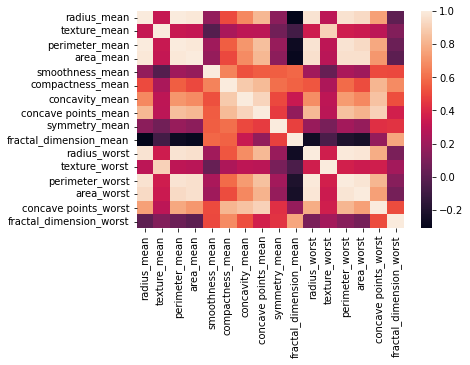

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'fractal_dimension_worst'], axis=1, inplace= True)

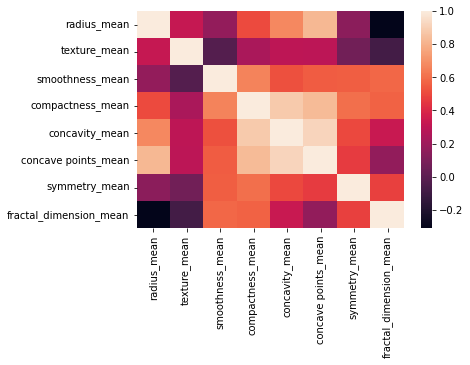

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.drop(['compactness_mean', 'concavity_mean', 'concave points_mean'], axis=1, inplace= True)

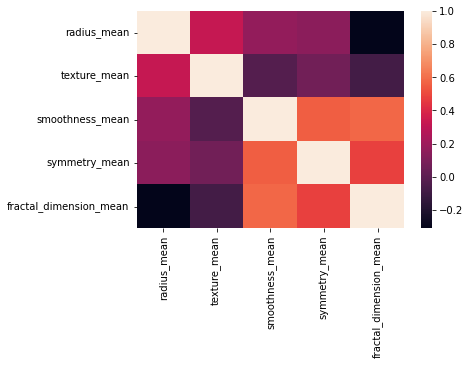

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':0, 'B':1})

In [ ]:
data.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
smoothness_mean           0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [ ]:
output = data.pop('diagnosis')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, output, test_size= 0.3, random_state= 42)

In [ ]:
clf = svm.SVC()
param_grid = {'kernel': ['linear', 'rbf', 'poly']}
model = GridSearchCV(clf, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
model.best_params_

{'kernel': 'rbf'}

In [ ]:
clf = svm.SVC(kernel='rbf')
param_grid = {'gamma': np.arange(1,5)}
model = GridSearchCV(clf, param_grid, cv = 5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'gamma': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'gamma': 1}

In [ ]:
clf = svm.SVC(kernel='rbf', gamma = 1)
clf.fit(x_train, y_train)

SVC(gamma=1)

In [ ]:
score = cross_val_score(clf, data, output, cv = 5)
print(np.mean(score))

0.8752057133985407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


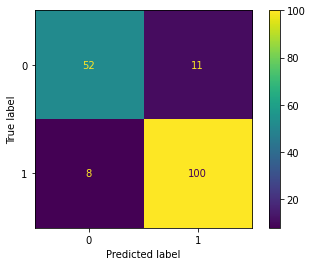

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)

In [ ]:
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.87      0.83      0.85        63
         yes       0.90      0.93      0.91       108

    accuracy                           0.89       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.89      0.89      0.89       171



In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,5)}
model = GridSearchCV(knn, param_grid, cv = 5)
model.fit(scaled, output)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [ ]:
model.best_params_

{'n_neighbors': 3}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(scaled, output)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
score = cross_val_score(knn, scaled, output, cv = 5)
print(np.mean(score))

0.9226517621487347
